<a href="https://colab.research.google.com/github/varghese-ascalonic/Germany-Rent-Predictor/blob/main/Multiple-Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetch Data from kaggle.
The dataset used can be found [here](https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany/code).


In [24]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d "corrieaar/apartment-rental-offers-in-germany/code"
! unzip "apartment-rental-offers-in-germany.zip"

#the data is present is the CSV file immo_data.csv after the archive is extracted
import pandas as pd
df = pd.read_csv("immo_data.csv")
df.head()

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              221KB  2021-03-26 07:27:32           1017  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            795  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            707  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:1

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


Living Space v/s Total Rent

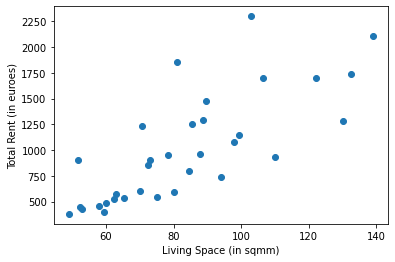

In [39]:
import numpy as np
import matplotlib.pyplot as plt

df = df.dropna()

y = df[["totalRent"]]
x = df[["livingSpace"]]

plt.scatter(x, y)
plt.xlabel("Living Space (in sqmm)")
plt.ylabel("Total Rent (in euroes)")
plt.show()

Linear Regression with living space as independant variable

Mean absolute error: 331.92
Residual sum of squares (MSE): 232023.50
R2-score: -0.73


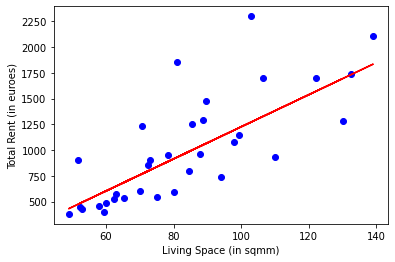

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
reg = LinearRegression().fit(x_train, y_train)

plt.scatter(x, y,  color='blue')
plt.plot(x_train, reg.coef_[0][0]*x_train + reg.intercept_[0], '-r')
plt.xlabel("Living Space (in sqmm)")
plt.ylabel("Total Rent (in euroes)")

predicted_y = reg.predict(x_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted_y - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - y_test) ** 2))
print("R2-score: %.2f" % r2_score(predicted_y , y_test) )

**Result : NOT ACCEPTABLE**

The Living space and the rent doesn't have an acceptable linear relationship

Now let's try incorporating another variable - the region. For example the rent in Bavaria is normally higher than the rest of Germany. We did not take that into account before. 

To convert categorical variable geo_bln into a numerical variable with some meaning, sort the regions based on the average rent in each region. The index of the resultant array will provide a suitable number for each category corresponding to the region.

['Brandenburg', 'Sachsen', 'Sachsen_Anhalt', 'Nordrhein_Westfalen', 'Mecklenburg_Vorpommern', 'Schleswig_Holstein', 'Hamburg', 'Hessen', 'Rheinland_Pfalz', 'Berlin', 'Bayern']


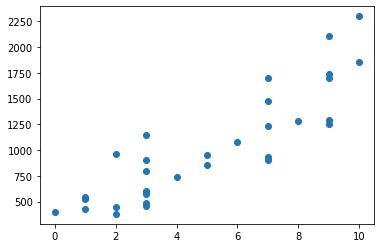

In [143]:
states = df["geo_bln"].unique()

# sort the regions based on the average rent
region_mean = df.groupby("geo_bln").mean()["totalRent"]
region_mean = region_mean.sort_values().keys().to_list()

print(region_mean)

# add a new column region_id which is proportional to the average rent in that region
for index, row in df.iterrows():
  df.loc[index,'region_id'] = region_mean.index(row["geo_bln"])

y = df[["totalRent"]]
region = df[["region_id"]]
space = df[["livingSpace"]]

plt.scatter(region, y)

Now try multiple linear regression with region id and living space as independant variables.

In [139]:
x = np.asanyarray(df[['region_id','livingSpace']])
y = np.asanyarray(df[['totalRent']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

reg = LinearRegression()
reg.fit (x, y)
# The coefficients
print ('Coefficients: ', reg.coef_)

predicted_y = reg.predict(x_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted_y - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - y_test) ** 2))
print("R2-score: %.2f" % r2_score(predicted_y , y_test))

Coefficients:  [[113.17232364   6.98574762]]
Mean absolute error: 122.66
Residual sum of squares (MSE): 21809.82
R2-score: 0.90


A quite acceptable R2 score! 

NOTE : Another approach would be using the average rent in the region directly instead of the region id. 

In [145]:
reg.predict([[1, 58]])

array([[386.90433266]])